In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

# API + Permission

In [80]:
data = pd.read_csv('Dataset/Drebin/api+permdrebin.csv')
data.head()

,SEND_SMS,READ_PHONE_STATE,GET_ACCOUNTS,RECEIVE_SMS,READ_SMS,USE_CREDENTIALS,MANAGE_ACCOUNTS,WRITE_SMS,READ_SYNC_SETTINGS,AUTHENTICATE_ACCOUNTS,...,ACCOUNT_MANAGER,TelephonyManager.getSimOperator,onBind,Process.start,Context.bindService,ProcessBuilder,Ljava.lang.Class.getResource,defineClass,findClass,class
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15031 entries, 0 to 15030
Columns: 182 entries, SEND_SMS to class
dtypes: int64(182)
memory usage: 20.9 MB


In [82]:
data = data.dropna()

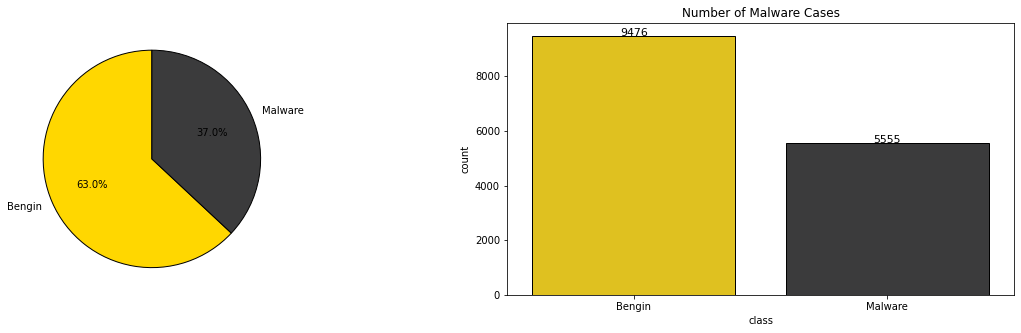

In [83]:
fraud = len(data[data['class'] == 1]) / len(data) * 100
nofraud = len(data[data['class'] == 0]) / len(data) * 100
fraud_percentage = [nofraud,fraud]

colors = ['#FFD700','#3B3B3C']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(fraud_percentage,labels = ['Bengin','Malware'],autopct='%1.1f%%',startangle = 90,colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})

plt.subplot(1,2,2)
ax = sns.countplot(x='class',data = data,edgecolor = 'black',palette = colors)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Bengin','Malware'])
plt.title('Number of Malware Cases');

In [84]:
X = data.drop('class', axis=1)
y = data['class']

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
model = LogisticRegression()

rfe = RFE(model, step=2)
rfe = rfe.fit(X, y)

# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['SEND_SMS', 'READ_PHONE_STATE', 'GET_ACCOUNTS', 'READ_SMS', 'USE_CREDENTIALS', 'MANAGE_ACCOUNTS', 'WRITE_SMS', 'WRITE_HISTORY_BOOKMARKS', 'READ_HISTORY_BOOKMARKS', 'INTERNET', 'NFC', 'ACCESS_LOCATION_EXTRA_COMMANDS', 'WRITE_APN_SETTINGS', 'BIND_REMOTEVIEWS', 'READ_PROFILE', 'MODIFY_AUDIO_SETTINGS', 'READ_SYNC_STATS', 'BROADCAST_STICKY', 'BLUETOOTH', 'READ_CALENDAR', 'READ_CALL_LOG', 'SUBSCRIBED_FEEDS_WRITE', 'SUBSCRIBED_FEEDS_READ', 'CHANGE_WIFI_MULTICAST_STATE', 'WRITE_CALENDAR', 'MASTER_CLEAR', 'UPDATE_DEVICE_STATS', 'WRITE_CALL_LOG', 'REORDER_TASKS', 'BIND_INPUT_METHOD', 'PROCESS_OUTGOING_CALLS', 'CALL_PRIVILEGED', 'BIND_WALLPAPER', 'BATTERY_STATS', 'ACCESS_COARSE_LOCATION', 'BLUETOOTH_ADMIN', 'BIND_DEVICE_ADMIN', 'CHANGE_NETWORK_STATE', 'CALL_PHONE', 'SET_PROCESS_LIMIT', 'MOUNT_UNMOUNT_FILESYSTEMS', 'CLEAR_APP_USER_DATA', 'CHANGE_WIFI_STATE', 'READ_FRAME_BUFFER', 'WRITE_CONTACTS', 'ACCESS_MOCK_LOCATION', 'GET_PACKAGE_SIZE', 'MODIFY_PHONE_STATE', 'CHANGE_COMPONEN

In [86]:
X_new = data[['SEND_SMS', 'READ_PHONE_STATE', 'GET_ACCOUNTS', 'READ_SMS', 'USE_CREDENTIALS', 'MANAGE_ACCOUNTS', 'WRITE_SMS', 'WRITE_HISTORY_BOOKMARKS', 'READ_HISTORY_BOOKMARKS', 'INTERNET', 'NFC', 'ACCESS_LOCATION_EXTRA_COMMANDS', 'WRITE_APN_SETTINGS', 'BIND_REMOTEVIEWS', 'READ_PROFILE', 'MODIFY_AUDIO_SETTINGS', 'READ_SYNC_STATS', 'BROADCAST_STICKY', 'BLUETOOTH', 'READ_CALENDAR', 'READ_CALL_LOG', 'SUBSCRIBED_FEEDS_WRITE', 'SUBSCRIBED_FEEDS_READ', 'CHANGE_WIFI_MULTICAST_STATE', 'WRITE_CALENDAR', 'MASTER_CLEAR', 'UPDATE_DEVICE_STATS', 'WRITE_CALL_LOG', 'REORDER_TASKS', 'BIND_INPUT_METHOD', 'PROCESS_OUTGOING_CALLS', 'CALL_PRIVILEGED', 'BIND_WALLPAPER', 'BATTERY_STATS', 'ACCESS_COARSE_LOCATION', 'BLUETOOTH_ADMIN', 'BIND_DEVICE_ADMIN', 'CHANGE_NETWORK_STATE', 'CALL_PHONE', 'SET_PROCESS_LIMIT', 'MOUNT_UNMOUNT_FILESYSTEMS', 'CLEAR_APP_USER_DATA', 'CHANGE_WIFI_STATE', 'READ_FRAME_BUFFER', 'WRITE_CONTACTS', 'ACCESS_MOCK_LOCATION', 'GET_PACKAGE_SIZE', 'MODIFY_PHONE_STATE', 'CHANGE_COMPONENT_ENABLED_STATE', 'CLEAR_APP_CACHE', 'SET_PREFERRED_APPLICATIONS', 'WRITE_SECURE_SETTINGS', 'transact', 'onServiceConnected', 'Ljava.lang.Class.getCanonicalName', 'Ljava.lang.Class.getMethods', 'Ljava.net.URLDecoder', 'android.telephony.SmsManager', 'getBinder', 'ClassLoader', 'Landroid.content.Context.unregisterReceiver', 'Ljava.lang.Class.getDeclaredField', 'getCallingUid', 'Ljavax.crypto.spec.SecretKeySpec', 'TelephonyManager.getLine1Number', 'HttpGet.init', 'SecretKey', 'System.loadLibrary', 'android.intent.action.SEND', 'android.telephony.gsm.SmsManager', 'TelephonyManager.getSubscriberId', 'Ljava.lang.Object.getClass', 'IBinder', 'createSubprocess', 'URLClassLoader', 'TelephonyManager.getDeviceId', 'PathClassLoader', 'Runtime.load', 'TelephonyManager.getCallState', 'sendMultipartTextMessage', 'PackageInstaller', 'TelephonyManager.isNetworkRoaming', 'HttpUriRequest', 'Runtime.exec', 'TelephonyManager.getNetworkOperator', 'SET_ALARM', 'TelephonyManager.getSimOperator', 'onBind', 'Ljava.lang.Class.getResource', 'findClass']]

In [87]:
rfe = rfe.fit(X_new, y)

# summarize the selection of the attributes
print('Selected features: %s' % list(X_new.columns[rfe.support_]))

Selected features: ['SEND_SMS', 'GET_ACCOUNTS', 'READ_SMS', 'USE_CREDENTIALS', 'MANAGE_ACCOUNTS', 'READ_HISTORY_BOOKMARKS', 'INTERNET', 'NFC', 'ACCESS_LOCATION_EXTRA_COMMANDS', 'BIND_REMOTEVIEWS', 'READ_PROFILE', 'MODIFY_AUDIO_SETTINGS', 'READ_SYNC_STATS', 'BLUETOOTH', 'READ_CALENDAR', 'READ_CALL_LOG', 'CHANGE_WIFI_MULTICAST_STATE', 'REORDER_TASKS', 'PROCESS_OUTGOING_CALLS', 'CALL_PRIVILEGED', 'BATTERY_STATS', 'BLUETOOTH_ADMIN', 'CHANGE_NETWORK_STATE', 'SET_PROCESS_LIMIT', 'READ_FRAME_BUFFER', 'WRITE_CONTACTS', 'transact', 'onServiceConnected', 'Ljava.lang.Class.getCanonicalName', 'Ljava.net.URLDecoder', 'android.telephony.SmsManager', 'getCallingUid', 'TelephonyManager.getLine1Number', 'android.intent.action.SEND', 'android.telephony.gsm.SmsManager', 'createSubprocess', 'URLClassLoader', 'TelephonyManager.getDeviceId', 'Runtime.load', 'sendMultipartTextMessage', 'PackageInstaller', 'TelephonyManager.isNetworkRoaming', 'Runtime.exec', 'TelephonyManager.getSimOperator', 'findClass']


In [88]:
X1 = data[['SEND_SMS', 'GET_ACCOUNTS', 'READ_SMS', 'USE_CREDENTIALS', 'MANAGE_ACCOUNTS', 'READ_HISTORY_BOOKMARKS', 'INTERNET', 'NFC', 'ACCESS_LOCATION_EXTRA_COMMANDS', 'BIND_REMOTEVIEWS', 'READ_PROFILE', 'MODIFY_AUDIO_SETTINGS', 'READ_SYNC_STATS', 'BLUETOOTH', 'READ_CALENDAR', 'READ_CALL_LOG', 'CHANGE_WIFI_MULTICAST_STATE', 'REORDER_TASKS', 'PROCESS_OUTGOING_CALLS', 'CALL_PRIVILEGED', 'BATTERY_STATS', 'BLUETOOTH_ADMIN', 'CHANGE_NETWORK_STATE', 'SET_PROCESS_LIMIT', 'READ_FRAME_BUFFER', 'WRITE_CONTACTS', 'transact', 'onServiceConnected', 'Ljava.lang.Class.getCanonicalName', 'Ljava.net.URLDecoder', 'android.telephony.SmsManager', 'getCallingUid', 'TelephonyManager.getLine1Number', 'android.intent.action.SEND', 'android.telephony.gsm.SmsManager', 'createSubprocess', 'URLClassLoader', 'TelephonyManager.getDeviceId', 'Runtime.load', 'sendMultipartTextMessage', 'PackageInstaller', 'TelephonyManager.isNetworkRoaming', 'Runtime.exec', 'TelephonyManager.getSimOperator', 'findClass']]
rfe = rfe.fit(X1, y)

# summarize the selection of the attributes
print('Selected features: %s' % list(X1.columns[rfe.support_]))

Selected features: ['SEND_SMS', 'USE_CREDENTIALS', 'MANAGE_ACCOUNTS', 'READ_HISTORY_BOOKMARKS', 'NFC', 'ACCESS_LOCATION_EXTRA_COMMANDS', 'BIND_REMOTEVIEWS', 'READ_PROFILE', 'BLUETOOTH', 'READ_CALENDAR', 'READ_CALL_LOG', 'CHANGE_WIFI_MULTICAST_STATE', 'BLUETOOTH_ADMIN', 'transact', 'Ljava.lang.Class.getCanonicalName', 'getCallingUid', 'android.intent.action.SEND', 'android.telephony.gsm.SmsManager', 'createSubprocess', 'TelephonyManager.getDeviceId', 'Runtime.load', 'sendMultipartTextMessage']


In [89]:
X_final = data[['SEND_SMS', 'USE_CREDENTIALS', 'MANAGE_ACCOUNTS', 'READ_HISTORY_BOOKMARKS', 'NFC', 'ACCESS_LOCATION_EXTRA_COMMANDS', 'BIND_REMOTEVIEWS', 'READ_PROFILE', 'BLUETOOTH', 'READ_CALENDAR', 'READ_CALL_LOG', 'CHANGE_WIFI_MULTICAST_STATE', 'BLUETOOTH_ADMIN', 'transact', 'Ljava.lang.Class.getCanonicalName', 'getCallingUid', 'android.intent.action.SEND', 'android.telephony.gsm.SmsManager', 'createSubprocess', 'TelephonyManager.getDeviceId', 'Runtime.load', 'sendMultipartTextMessage']]

In [90]:
X_final

,SEND_SMS,USE_CREDENTIALS,MANAGE_ACCOUNTS,READ_HISTORY_BOOKMARKS,NFC,ACCESS_LOCATION_EXTRA_COMMANDS,BIND_REMOTEVIEWS,READ_PROFILE,BLUETOOTH,READ_CALENDAR,...,BLUETOOTH_ADMIN,transact,Ljava.lang.Class.getCanonicalName,getCallingUid,android.intent.action.SEND,android.telephony.gsm.SmsManager,createSubprocess,TelephonyManager.getDeviceId,Runtime.load,sendMultipartTextMessage
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15026,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,1,0,0
15027,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15029,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,1,0,0


In [91]:
df = pd.DataFrame(data, columns=['SEND_SMS', 'USE_CREDENTIALS', 'MANAGE_ACCOUNTS', 'READ_HISTORY_BOOKMARKS', 'NFC', 'ACCESS_LOCATION_EXTRA_COMMANDS', 'BIND_REMOTEVIEWS', 'READ_PROFILE', 'BLUETOOTH', 'READ_CALENDAR', 'READ_CALL_LOG', 'CHANGE_WIFI_MULTICAST_STATE', 'BLUETOOTH_ADMIN', 'transact', 'Ljava.lang.Class.getCanonicalName', 'getCallingUid', 'android.intent.action.SEND', 'android.telephony.gsm.SmsManager', 'createSubprocess', 'TelephonyManager.getDeviceId', 'Runtime.load', 'sendMultipartTextMessage', 'Class'])

In [92]:
df.to_csv('debrin.csv')

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2) # keeping 15% for test 

In [79]:
X_train.shape

(12024, 27)

In [17]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)
y_pred = log.predict(X_test)

lr_acc_a = accuracy_score(y_test,y_pred)
lr_prec_a = precision_score(y_test,y_pred)
lr_rec_a = recall_score(y_test,y_pred)
lr_f1_a = f1_score(y_test,y_pred)

In [20]:
storeResults('API+Permission : LR',lr_acc_a,lr_prec_a,lr_rec_a,lr_f1_a)

# SVM

In [21]:
# Support Vector Classifier model 
from sklearn.svm import SVC
svc = SVC()

# fit the model 
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

svc_acc_a = accuracy_score(y_test,y_pred)
svc_prec_a = precision_score(y_test,y_pred)
svc_rec_a = recall_score(y_test,y_pred)
svc_f1_a = f1_score(y_test,y_pred)

In [22]:
storeResults('API+Permission : SVC',svc_acc_a,svc_prec_a,svc_rec_a,svc_f1_a)

# KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

# fit the model 
neigh.fit(X_train,y_train)
y_pred = neigh.predict(X_test)

knn_acc_a = accuracy_score(y_test,y_pred)
knn_prec_a = precision_score(y_test,y_pred)
knn_rec_a = recall_score(y_test,y_pred)
knn_f1_a = f1_score(y_test,y_pred)

In [24]:
storeResults('API+Permission : KNN',knn_acc_a,knn_prec_a,knn_rec_a,knn_f1_a)

# Random Forest

In [25]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model 
forest.fit(X_train,y_train)
y_pred = forest.predict(X_test)

rf_acc_a = accuracy_score(y_test,y_pred)
rf_prec_a = precision_score(y_test,y_pred)
rf_rec_a = recall_score(y_test,y_pred)
rf_f1_a = f1_score(y_test,y_pred)

In [26]:
storeResults('API+Permission : RF',rf_acc_a,rf_prec_a,rf_rec_a,rf_f1_a)

# Decision Tree

In [27]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

dt_acc_a = accuracy_score(y_test,y_pred)
dt_prec_a = precision_score(y_test,y_pred)
dt_rec_a = recall_score(y_test,y_pred)
dt_f1_a = f1_score(y_test,y_pred)

In [28]:
storeResults('API+Permission : DT',dt_acc_a,dt_prec_a,dt_rec_a,dt_f1_a)

# Stacking Classifier

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier

estimators = [('rf', RandomForestClassifier(n_estimators=10)),('mlp', MLPClassifier(random_state=1, max_iter=300))]

clf1 = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier())
# fit the model 
clf1.fit(X_train, y_train)
# fit the model 
y_pred = clf1.predict(X_test)

stac_acc_a = accuracy_score(y_test,y_pred)
stac_prec_a = precision_score(y_test,y_pred)
stac_rec_a = recall_score(y_test,y_pred)
stac_f1_a = f1_score(y_test,y_pred)



In [30]:
storeResults('API+Premision : Stacking Classifier',stac_acc_a,stac_prec_a,stac_rec_a,stac_f1_a)

0.9512641383898869

# Only API

In [31]:
data = pd.read_csv('Dataset/Drebin/onlyapidrebin.csv')
data.head()

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,Ljava.net.URLDecoder,...,ACCOUNT_MANAGER,TelephonyManager.getSimOperator,onBind,Process.start,Context.bindService,ProcessBuilder,Ljava.lang.Class.getResource,defineClass,findClass,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,1


In [32]:
data = data.dropna()

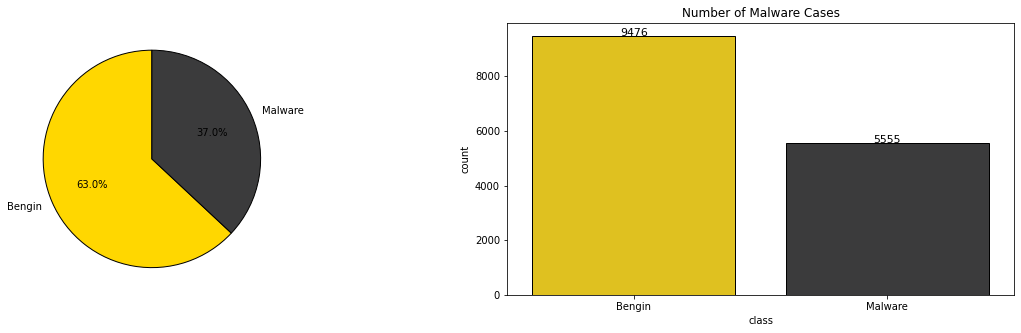

In [33]:
fraud = len(data[data['class'] == 1]) / len(data) * 100
nofraud = len(data[data['class'] == 0]) / len(data) * 100
fraud_percentage = [nofraud,fraud]

colors = ['#FFD700','#3B3B3C']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(fraud_percentage,labels = ['Bengin','Malware'],autopct='%1.1f%%',startangle = 90,colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})

plt.subplot(1,2,2)
ax = sns.countplot(x='class',data = data,edgecolor = 'black',palette = colors)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Bengin','Malware'])
plt.title('Number of Malware Cases');

In [34]:
X = data.drop('class', axis=1)
y = data['class']

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
model = LogisticRegression()

rfe = RFE(model, step=2)
rfe = rfe.fit(X, y)

# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['transact', 'onServiceConnected', 'Ljava.lang.Class.getCanonicalName', 'Ljava.lang.Class.getMethods', 'Ljava.net.URLDecoder', 'android.telephony.SmsManager', 'getBinder', 'ClassLoader', 'Landroid.content.Context.unregisterReceiver', 'getCallingUid', 'Ljavax.crypto.spec.SecretKeySpec', 'TelephonyManager.getLine1Number', 'DexClassLoader', 'HttpGet.init', 'SecretKey', 'System.loadLibrary', 'android.intent.action.SEND', 'android.telephony.gsm.SmsManager', 'TelephonyManager.getSubscriberId', 'createSubprocess', 'URLClassLoader', 'TelephonyManager.getDeviceId', 'Runtime.load', 'TelephonyManager.getCallState', 'sendMultipartTextMessage', 'PackageInstaller', 'TelephonyManager.isNetworkRoaming', 'HttpUriRequest', 'Runtime.exec', 'SET_ALARM', 'ACCOUNT_MANAGER', 'TelephonyManager.getSimOperator', 'onBind', 'Process.start', 'Ljava.lang.Class.getResource', 'findClass']


In [36]:
X_1 = data[['transact', 'onServiceConnected', 'Ljava.lang.Class.getCanonicalName', 'Ljava.lang.Class.getMethods', 'Ljava.net.URLDecoder', 'android.telephony.SmsManager', 'getBinder', 'ClassLoader', 'Landroid.content.Context.unregisterReceiver', 'getCallingUid', 'Ljavax.crypto.spec.SecretKeySpec', 'TelephonyManager.getLine1Number', 'DexClassLoader', 'HttpGet.init', 'SecretKey', 'System.loadLibrary', 'android.intent.action.SEND', 'android.telephony.gsm.SmsManager', 'TelephonyManager.getSubscriberId', 'createSubprocess', 'URLClassLoader', 'TelephonyManager.getDeviceId', 'Runtime.load', 'TelephonyManager.getCallState', 'sendMultipartTextMessage', 'PackageInstaller', 'TelephonyManager.isNetworkRoaming', 'HttpUriRequest', 'Runtime.exec', 'SET_ALARM', 'ACCOUNT_MANAGER', 'TelephonyManager.getSimOperator', 'onBind', 'Process.start', 'Ljava.lang.Class.getResource', 'findClass']]

In [37]:
rfe = rfe.fit(X_1, y)

# summarize the selection of the attributes
print('Selected features: %s' % list(X_1.columns[rfe.support_]))

Selected features: ['transact', 'Ljava.lang.Class.getCanonicalName', 'Ljava.lang.Class.getMethods', 'android.telephony.SmsManager', 'getBinder', 'getCallingUid', 'android.intent.action.SEND', 'android.telephony.gsm.SmsManager', 'createSubprocess', 'URLClassLoader', 'TelephonyManager.getDeviceId', 'Runtime.load', 'TelephonyManager.getCallState', 'sendMultipartTextMessage', 'PackageInstaller', 'SET_ALARM', 'ACCOUNT_MANAGER', 'findClass']


In [38]:
X_1

,transact,onServiceConnected,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.net.URLDecoder,android.telephony.SmsManager,getBinder,ClassLoader,Landroid.content.Context.unregisterReceiver,getCallingUid,...,TelephonyManager.isNetworkRoaming,HttpUriRequest,Runtime.exec,SET_ALARM,ACCOUNT_MANAGER,TelephonyManager.getSimOperator,onBind,Process.start,Ljava.lang.Class.getResource,findClass
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,1,0,1,0
4,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15026,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,0,0,1,0,1,0
15027,0,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0
15028,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
15029,1,1,1,1,1,0,0,1,1,0,...,0,1,1,0,0,0,1,0,1,1


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.2) # keeping 15% for test 

# Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log1 = LogisticRegression()

# fit the model 
log1.fit(X_train,y_train)
y_pred = log1.predict(X_test)

lr_acc_b = accuracy_score(y_test,y_pred)
lr_prec_b = precision_score(y_test,y_pred)
lr_rec_b = recall_score(y_test,y_pred)
lr_f1_b = f1_score(y_test,y_pred)

In [41]:
storeResults('API : LR',lr_acc_b,lr_prec_b,lr_rec_b,lr_f1_b)

# SVC

In [42]:
# Support Vector Classifier model 
from sklearn.svm import SVC
svc1 = SVC()

# fit the model 
svc1.fit(X_train,y_train)
y_pred = svc1.predict(X_test)

svc_acc_b = accuracy_score(y_test,y_pred)
svc_prec_b = precision_score(y_test,y_pred)
svc_rec_b = recall_score(y_test,y_pred)
svc_f1_b = f1_score(y_test,y_pred)

In [43]:
storeResults('API : SVC',svc_acc_b,svc_prec_b,svc_rec_b,svc_f1_b)

# KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier
neigh1 = KNeighborsClassifier(n_neighbors=3)

# fit the model 
neigh1.fit(X_train,y_train)
y_pred = neigh1.predict(X_test)

knn_acc_b = accuracy_score(y_test,y_pred)
knn_prec_b = precision_score(y_test,y_pred)
knn_rec_b = recall_score(y_test,y_pred)
knn_f1_b = f1_score(y_test,y_pred)

In [45]:
storeResults('API : KNN',knn_acc_b,knn_prec_b,knn_rec_b,knn_f1_b)

# Random FOrest

In [46]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest1 = RandomForestClassifier(n_estimators=10)

# fit the model 
forest1.fit(X_train,y_train)
y_pred = forest1.predict(X_test)

rf_acc_b = accuracy_score(y_test,y_pred)
rf_prec_b = precision_score(y_test,y_pred)
rf_rec_b = recall_score(y_test,y_pred)
rf_f1_b = f1_score(y_test,y_pred)

In [47]:
storeResults('API : RF',rf_acc_b,rf_prec_b,rf_rec_b,rf_f1_b)

# Decision Tree

In [48]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree1 = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree1.fit(X_train, y_train)

y_pred = tree1.predict(X_test)

dt_acc_b = accuracy_score(y_test,y_pred)
dt_prec_b = precision_score(y_test,y_pred)
dt_rec_b = recall_score(y_test,y_pred)
dt_f1_b = f1_score(y_test,y_pred)

In [49]:
storeResults('API : DT',dt_acc_b,dt_prec_b,dt_rec_b,dt_f1_b)

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier

estimators = [('rf', RandomForestClassifier(n_estimators=10)),('mlp', MLPClassifier(random_state=1, max_iter=300))]

clf1 = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier())
# fit the model 
clf1.fit(X_train, y_train)
# fit the model 
y_pred = clf1.predict(X_test)

stac_acc_a = accuracy_score(y_test,y_pred)
stac_prec_a = precision_score(y_test,y_pred)
stac_rec_a = recall_score(y_test,y_pred)
stac_f1_a = f1_score(y_test,y_pred)

storeResults('API : Stacking Classifier',stac_acc_a,stac_prec_a,stac_rec_a,stac_f1_a)

# Only Permission

In [51]:
data = pd.read_csv('Dataset/Drebin/onlypermissionsdrebin.csv')
data.head()

,SEND_SMS,READ_PHONE_STATE,GET_ACCOUNTS,RECEIVE_SMS,READ_SMS,USE_CREDENTIALS,MANAGE_ACCOUNTS,WRITE_SMS,READ_SYNC_SETTINGS,AUTHENTICATE_ACCOUNTS,...,SET_ORIENTATION,READ_CONTACTS,DEVICE_POWER,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,classs
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,1,1,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1


In [52]:
data = data.dropna()

In [53]:
X = data.drop('classs', axis=1)
y = data['classs']

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
model = LogisticRegression()

rfe = RFE(model, step=2)
rfe = rfe.fit(X, y)

# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['SEND_SMS', 'READ_PHONE_STATE', 'GET_ACCOUNTS', 'READ_SMS', 'USE_CREDENTIALS', 'MANAGE_ACCOUNTS', 'AUTHENTICATE_ACCOUNTS', 'WRITE_HISTORY_BOOKMARKS', 'CAMERA', 'READ_HISTORY_BOOKMARKS', 'INTERNET', 'NFC', 'ACCESS_LOCATION_EXTRA_COMMANDS', 'WRITE_APN_SETTINGS', 'BIND_REMOTEVIEWS', 'READ_PROFILE', 'MODIFY_AUDIO_SETTINGS', 'READ_SYNC_STATS', 'BROADCAST_STICKY', 'WAKE_LOCK', 'BLUETOOTH', 'READ_CALENDAR', 'READ_CALL_LOG', 'READ_EXTERNAL_STORAGE', 'ACCESS_NETWORK_STATE', 'CHANGE_WIFI_MULTICAST_STATE', 'MASTER_CLEAR', 'WRITE_CALL_LOG', 'GLOBAL_SEARCH', 'WRITE_USER_DICTIONARY', 'REORDER_TASKS', 'SET_WALLPAPER', 'BIND_INPUT_METHOD', 'PROCESS_OUTGOING_CALLS', 'CALL_PRIVILEGED', 'BIND_WALLPAPER', 'WRITE_SETTINGS', 'BLUETOOTH_ADMIN', 'BIND_DEVICE_ADMIN', 'PERSISTENT_ACTIVITY', 'CHANGE_NETWORK_STATE', 'BROADCAST_WAP_PUSH', 'BIND_ACCESSIBILITY_SERVICE', 'CALL_PHONE', 'SET_PROCESS_LIMIT', 'INSTALL_LOCATION_PROVIDER', 'CHANGE_CONFIGURATION', 'CHANGE_WIFI_STATE', 'READ_FRAME_BUFFER'

In [55]:
X_1 = data[['SEND_SMS', 'READ_PHONE_STATE', 'GET_ACCOUNTS', 'READ_SMS', 'USE_CREDENTIALS', 'MANAGE_ACCOUNTS', 'AUTHENTICATE_ACCOUNTS', 'WRITE_HISTORY_BOOKMARKS', 'CAMERA', 'READ_HISTORY_BOOKMARKS', 'INTERNET', 'NFC', 'ACCESS_LOCATION_EXTRA_COMMANDS', 'WRITE_APN_SETTINGS', 'BIND_REMOTEVIEWS', 'READ_PROFILE', 'MODIFY_AUDIO_SETTINGS', 'READ_SYNC_STATS', 'BROADCAST_STICKY', 'WAKE_LOCK', 'BLUETOOTH', 'READ_CALENDAR', 'READ_CALL_LOG', 'READ_EXTERNAL_STORAGE', 'ACCESS_NETWORK_STATE', 'CHANGE_WIFI_MULTICAST_STATE', 'MASTER_CLEAR', 'WRITE_CALL_LOG', 'GLOBAL_SEARCH', 'WRITE_USER_DICTIONARY', 'REORDER_TASKS', 'SET_WALLPAPER', 'BIND_INPUT_METHOD', 'PROCESS_OUTGOING_CALLS', 'CALL_PRIVILEGED', 'BIND_WALLPAPER', 'WRITE_SETTINGS', 'BLUETOOTH_ADMIN', 'BIND_DEVICE_ADMIN', 'PERSISTENT_ACTIVITY', 'CHANGE_NETWORK_STATE', 'BROADCAST_WAP_PUSH', 'BIND_ACCESSIBILITY_SERVICE', 'CALL_PHONE', 'SET_PROCESS_LIMIT', 'INSTALL_LOCATION_PROVIDER', 'CHANGE_CONFIGURATION', 'CHANGE_WIFI_STATE', 'READ_FRAME_BUFFER', 'WRITE_CONTACTS', 'MODIFY_PHONE_STATE', 'CHANGE_COMPONENT_ENABLED_STATE', 'SET_WALLPAPER_HINTS', 'SET_PREFERRED_APPLICATIONS']]

In [56]:
rfe = rfe.fit(X_1, y)

# summarize the selection of the attributes
print('Selected features: %s' % list(X_1.columns[rfe.support_]))

Selected features: ['SEND_SMS', 'READ_PHONE_STATE', 'GET_ACCOUNTS', 'READ_SMS', 'USE_CREDENTIALS', 'MANAGE_ACCOUNTS', 'WRITE_HISTORY_BOOKMARKS', 'INTERNET', 'NFC', 'ACCESS_LOCATION_EXTRA_COMMANDS', 'BIND_REMOTEVIEWS', 'READ_PROFILE', 'MODIFY_AUDIO_SETTINGS', 'READ_SYNC_STATS', 'BROADCAST_STICKY', 'READ_CALENDAR', 'READ_CALL_LOG', 'ACCESS_NETWORK_STATE', 'CHANGE_WIFI_MULTICAST_STATE', 'MASTER_CLEAR', 'WRITE_CALL_LOG', 'REORDER_TASKS', 'CALL_PRIVILEGED', 'WRITE_SETTINGS', 'BROADCAST_WAP_PUSH', 'READ_FRAME_BUFFER', 'MODIFY_PHONE_STATE']


In [57]:
X_final = data[['SEND_SMS', 'READ_PHONE_STATE', 'GET_ACCOUNTS', 'READ_SMS', 'USE_CREDENTIALS', 'MANAGE_ACCOUNTS', 'WRITE_HISTORY_BOOKMARKS', 'INTERNET', 'NFC', 'ACCESS_LOCATION_EXTRA_COMMANDS', 'BIND_REMOTEVIEWS', 'READ_PROFILE', 'MODIFY_AUDIO_SETTINGS', 'READ_SYNC_STATS', 'BROADCAST_STICKY', 'READ_CALENDAR', 'READ_CALL_LOG', 'ACCESS_NETWORK_STATE', 'CHANGE_WIFI_MULTICAST_STATE', 'MASTER_CLEAR', 'WRITE_CALL_LOG', 'REORDER_TASKS', 'CALL_PRIVILEGED', 'WRITE_SETTINGS', 'BROADCAST_WAP_PUSH', 'READ_FRAME_BUFFER', 'MODIFY_PHONE_STATE']]

In [58]:
X_final

,SEND_SMS,READ_PHONE_STATE,GET_ACCOUNTS,READ_SMS,USE_CREDENTIALS,MANAGE_ACCOUNTS,WRITE_HISTORY_BOOKMARKS,INTERNET,NFC,ACCESS_LOCATION_EXTRA_COMMANDS,...,ACCESS_NETWORK_STATE,CHANGE_WIFI_MULTICAST_STATE,MASTER_CLEAR,WRITE_CALL_LOG,REORDER_TASKS,CALL_PRIVILEGED,WRITE_SETTINGS,BROADCAST_WAP_PUSH,READ_FRAME_BUFFER,MODIFY_PHONE_STATE
0,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15026,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
15027,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
15028,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
15029,0,0,1,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2) # keeping 15% for test 

# Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log2 = LogisticRegression()

# fit the model 
log2.fit(X_train,y_train)
y_pred = log2.predict(X_test)

lr_acc_c = accuracy_score(y_test,y_pred)
lr_prec_c = precision_score(y_test,y_pred)
lr_rec_c = recall_score(y_test,y_pred)
lr_f1_c = f1_score(y_test,y_pred)

In [61]:
storeResults('Premission : LR',lr_acc_c,lr_prec_c,lr_rec_c,lr_f1_c)

# SVC

In [62]:
# Support Vector Classifier model 
from sklearn.svm import SVC
svc2 = SVC()

# fit the model 
svc2.fit(X_train,y_train)
y_pred = svc2.predict(X_test)

svc_acc_c = accuracy_score(y_test,y_pred)
svc_prec_c = precision_score(y_test,y_pred)
svc_rec_c = recall_score(y_test,y_pred)
svc_f1_c = f1_score(y_test,y_pred)

In [63]:
storeResults('Premission : SVC',svc_acc_c,svc_prec_c,svc_rec_c,svc_f1_c)

# KNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier
neigh2 = KNeighborsClassifier(n_neighbors=3)

# fit the model 
neigh2.fit(X_train,y_train)
y_pred = neigh2.predict(X_test)

knn_acc_c = accuracy_score(y_test,y_pred)
knn_prec_c = precision_score(y_test,y_pred)
knn_rec_c = recall_score(y_test,y_pred)
knn_f1_c = f1_score(y_test,y_pred)

In [65]:
storeResults('Premission : KNN',knn_acc_c,knn_prec_c,knn_rec_c,knn_f1_c)

# Random FOrest

In [66]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest2 = RandomForestClassifier(n_estimators=10)

# fit the model 
forest2.fit(X_train,y_train)
y_pred = forest2.predict(X_test)

rf_acc_c = accuracy_score(y_test,y_pred)
rf_prec_c = precision_score(y_test,y_pred)
rf_rec_c = recall_score(y_test,y_pred)
rf_f1_c = f1_score(y_test,y_pred)

In [67]:
storeResults('Premission : RF',rf_acc_c,rf_prec_c,rf_rec_c,rf_f1_c)

# Decision Tree

In [68]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree2 = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree2.fit(X_train, y_train)

y_pred = tree2.predict(X_test)

dt_acc_c = accuracy_score(y_test,y_pred)
dt_prec_c = precision_score(y_test,y_pred)
dt_rec_c = recall_score(y_test,y_pred)
dt_f1_c = f1_score(y_test,y_pred)

In [69]:
storeResults('Premission : DT',dt_acc_c,dt_prec_c,dt_rec_c,dt_f1_c)

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier

estimators = [('rf', RandomForestClassifier(n_estimators=10)),('mlp', MLPClassifier(random_state=1, max_iter=300))]

clf1 = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier())

# fit the model 
clf1.fit(X_train, y_train)

y_pred = clf1.predict(X_test)

stac_acc_a = accuracy_score(y_test,y_pred)
stac_prec_a = precision_score(y_test,y_pred)
stac_rec_a = recall_score(y_test,y_pred)
stac_f1_a = f1_score(y_test,y_pred)

storeResults('Premission : Stacking Classifier',stac_acc_a,stac_prec_a,stac_rec_a,stac_f1_a)

# Comparison

In [71]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                       'Precision': precision, 
                       'f1_score' : f1score,
                        'Recall'   : recall,
                        
                      })

In [72]:
result

,ML Model,Accuracy,Precision,f1_score,Recall
0,API+Permission : LR,0.93,0.89,0.91,0.92
1,API+Permission : SVC,0.94,0.91,0.92,0.93
2,API+Permission : KNN,0.94,0.90,0.92,0.93
3,API+Permission : RF,0.94,0.91,0.92,0.93
4,API+Permission : DT,0.94,0.91,0.92,0.93
5,API+Premision : Stacking Classifier,0.95,0.94,0.93,0.93
6,API : LR,0.95,0.94,0.94,0.93
7,API : SVC,0.96,0.96,0.95,0.94
8,API : KNN,0.96,0.96,0.95,0.95
9,API : RF,0.97,0.97,0.95,0.94


# Graph

In [73]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

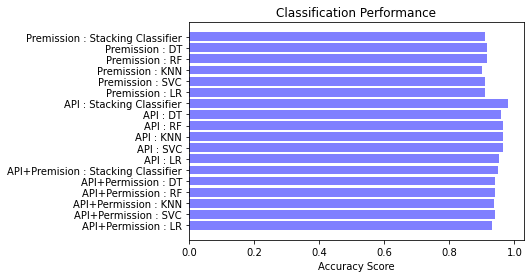

In [74]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

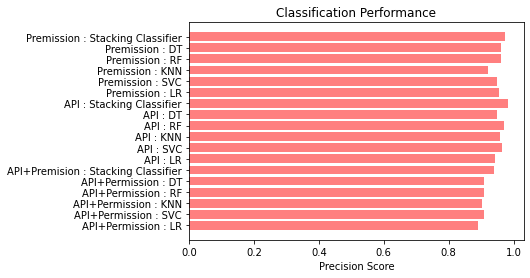

In [75]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

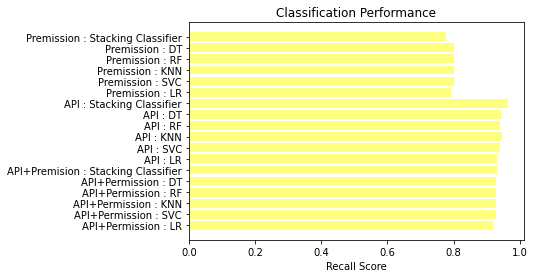

In [76]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

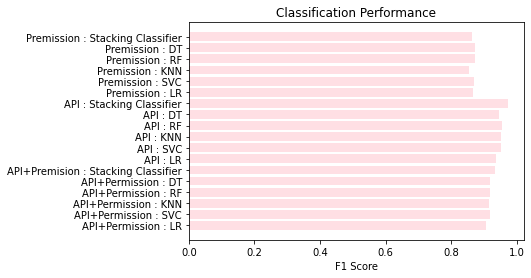

In [77]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='pink')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# Modelling

In [96]:
import joblib
filename = 'model_derbin.sav'
joblib.dump(clf1, filename)

['model_derbin.sav']